In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, exposure
from scipy import ndimage

In [0]:
train, test = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [0]:
X_train, y_train = train
X_test, y_test = test

In [0]:
X_train = X_train.reshape((-1, 28, 28, 1)) / 255.0
X_test = X_test.reshape((-1, 28, 28, 1)) / 255.0

Weird One

In [0]:
input_data = tf.placeholder(tf.float32, [None, 28, 28, 1])
input_labels = tf.placeholder(tf.int64, [None])
base_learning_rate = 0.01

conv133 = tf.layers.conv2d(inputs=input_data, filters=32, kernel_size=(3, 3), \
    strides=(2, 2), padding='same', activation=tf.nn.relu)
pool133 = tf.layers.max_pooling2d(inputs=conv133, pool_size=(2, 2), \
    strides=(2, 2), padding='same')
conv155 = tf.layers.conv2d(inputs=input_data, filters=16, kernel_size=(5, 5), \
    strides=(2, 2), padding='same', activation=tf.nn.relu)
pool155 = tf.layers.max_pooling2d(inputs=conv155, pool_size=(2, 2), \
    strides=(2, 2), padding='same')
conv177 = tf.layers.conv2d(inputs=input_data, filters=8, kernel_size=(7, 7), \
    strides=(2, 2), padding='same', activation=tf.nn.relu)
pool177 = tf.layers.max_pooling2d(inputs=conv177, pool_size=(2, 2), \
    strides=(2, 2), padding='same')
conv111 = tf.layers.conv2d(inputs=input_data, filters=64, kernel_size=(1, 1), \
    strides=(2, 2), padding='same', activation=tf.nn.relu)
pool111 = tf.layers.max_pooling2d(inputs=conv111, pool_size=(2, 2), \
    strides=(2, 2), padding='same')
concat_conv = tf.concat(values=[pool133, pool155, pool177, pool111], axis=3)

conv_final = tf.layers.conv2d(inputs=concat_conv, filters=128, kernel_size=(3, 3), \
    strides=(2, 2), padding='same', activation=tf.nn.relu)
pool_final = tf.layers.max_pooling2d(inputs=conv_final, pool_size=(2, 2), \
    strides=(2, 2), padding='same')

flattened_output = tf.layers.flatten(pool_final)
dense1 = tf.layers.dense(inputs=flattened_output, units=128, \
    activation=tf.nn.relu, kernel_regularizer=None)
# dense2 = tf.layers.dense(inputs=dense1, units=128, \
#     activation=tf.nn.relu, kernel_regularizer=None)
# dense2 = tf.layers.dense(inputs=dense1, units=128, \
#     activation=tf.nn.relu, kernel_regularizer=tf.contrib.layers.l2_regularizer(10e-9))
logits = tf.layers.dense(inputs=dense1, units=10)

predictions = tf.nn.softmax(logits)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
    (labels=tf.one_hot(input_labels, 10), logits=logits))
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
#     (labels=tf.one_hot(input_labels, 10), logits=logits)) \
#      + tf.losses.get_regularization_loss()

global_step = tf.Variable(0, trainable=False, name='global_step')

learning_rate = tf.train.exponential_decay(base_learning_rate, global_step,
                                           800, 0.97, staircase=True)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
optimizer = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.argmax(predictions,1), input_labels)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [0]:
num_examples = X_train.shape[0]
train_accs = []
test_accs = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    n_epochs = 10 # number of epochs to run for while training
    batch_size = 128 # size of the batch
    
    for epoch in range(n_epochs):
        print('At epoch {}'.format(epoch))
        epoch_loss = 0 # holds cumulative loss over the epoch
        # will hold predictions for training data at this epoch
        c = 0 # will count the number of batches
        train_acc_sum = 0.0
        for i in range(0, num_examples, batch_size):
            x_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]
            train_loss, _, train_acc = sess.run([loss, optimizer, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})

            epoch_loss += train_loss
            c += 1
            train_acc_sum += train_acc
#             print('Have fed: {}/{}. train_loss: {} and train_acc: {}'\
#                 .format(i, num_examples, train_loss, train_acc))
        print('epoch_loss: {}'.format(epoch_loss))
        train_accs.append(train_acc_sum * 1.0 / c)
        print('Checking test set statistics at end of epoch')
        test_loss, test_acc = sess.run([loss, accuracy], \
            feed_dict={input_data: X_test, input_labels: y_test})
        print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))
        test_accs.append(test_acc)
#         if test_acc > best_test_acc:
#             saver.save(sess, \
#                 'mnist_models/mnist_{}_{}'.format(epoch, test_acc).replace('.', '_'))
#             best_test_acc = test_acc

    print('\n\nFinal test set statistics')
    test_loss, test_acc = sess.run([loss, accuracy], \
            feed_dict={input_data: X_test, input_labels: y_test})

    print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))

At epoch 0
epoch_loss: 127.70036865
Checking test set statistics at end of epoch
test_loss: 0.0862900689244 and test_acc: 0.974500000477
At epoch 1
epoch_loss: 38.0629368415
Checking test set statistics at end of epoch
test_loss: 0.059440087527 and test_acc: 0.980000019073
At epoch 2
epoch_loss: 25.843772272
Checking test set statistics at end of epoch
test_loss: 0.0486772283912 and test_acc: 0.983099997044
At epoch 3
epoch_loss: 19.3386846007
Checking test set statistics at end of epoch
test_loss: 0.0453171692789 and test_acc: 0.985099971294
At epoch 4
epoch_loss: 15.4269858965
Checking test set statistics at end of epoch
test_loss: 0.0523215681314 and test_acc: 0.982599973679
At epoch 5
epoch_loss: 13.0552666323
Checking test set statistics at end of epoch
test_loss: 0.0476747304201 and test_acc: 0.984200000763
At epoch 6
epoch_loss: 11.0113711171
Checking test set statistics at end of epoch
test_loss: 0.0593116767704 and test_acc: 0.98290002346
At epoch 7
epoch_loss: 9.77374494297
C

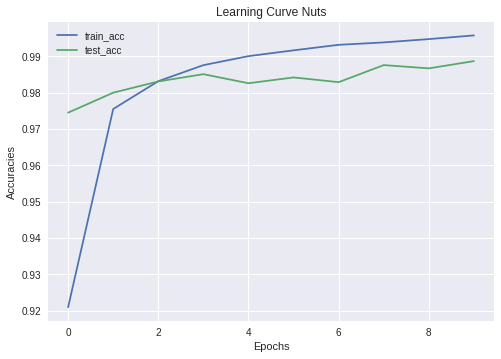

In [0]:
plt.plot(train_accs, label='train_acc')
plt.plot(test_accs, label='test_acc')
plt.ylabel('Accuracies')
plt.xlabel('Epochs')
plt.title('Learning Curve Nuts')
plt.legend()
plt.show()

Proper one 

In [0]:
input_data = tf.placeholder(tf.float32, [None, 28, 28, 1])
input_labels = tf.placeholder(tf.int64, [None])
base_learning_rate = 0.05

conv1 = tf.layers.conv2d(inputs=input_data, filters=16, kernel_size=(3, 3), \
    strides=(2, 2), padding='same', activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=(2, 2), strides=(2, 2), padding='same')
conv2 = tf.layers.conv2d(inputs=pool1, filters=32, kernel_size=(3, 3), \
    strides=(2, 2), padding='same', activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=(2, 2), strides=(2, 2), padding='same')
final_output = pool2

flattened_output = tf.layers.flatten(final_output)
dense1 = tf.layers.dense(inputs=flattened_output, units=128, activation=tf.nn.relu)
# dense2 = tf.layers.dense(inputs=dense1, units=128, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=dense1, units=10)

predictions = tf.nn.softmax(logits)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
    (labels=tf.one_hot(input_labels, 10), logits=logits))

global_step = tf.Variable(0, trainable=False, name='global_step')

learning_rate = tf.train.exponential_decay(base_learning_rate, global_step,
                                           800, 0.95, staircase=True)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
optimizer = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.argmax(predictions,1), input_labels)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [0]:
num_examples = X_train.shape[0]
train_accs = []
test_accs = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    n_epochs = 10 # number of epochs to run for while training
    batch_size = 128 # size of the batch
    
    for epoch in range(n_epochs):
        print('At epoch {}'.format(epoch))
        epoch_loss = 0 # holds cumulative loss over the epoch
        # will hold predictions for training data at this epoch
        c = 0 # will count the number of batches
        train_acc_sum = 0.0
        for i in range(0, num_examples, batch_size):
            x_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]
            train_loss, _, train_acc = sess.run([loss, optimizer, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})

            epoch_loss += train_loss
            c += 1
            train_acc_sum += train_acc
#             print('Have fed: {}/{}. train_loss: {} and train_acc: {}'\
#                 .format(i, num_examples, train_loss, train_acc))
        print('epoch_loss: {}'.format(epoch_loss))
        train_accs.append(train_acc_sum * 1.0 / c)
        print('Checking test set statistics at end of epoch')
        test_loss, test_acc = sess.run([loss, accuracy], \
            feed_dict={input_data: X_test, input_labels: y_test})
        print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))
        test_accs.append(test_acc)
#         if test_acc > best_test_acc:
#             saver.save(sess, \
#                 'mnist_models/mnist_{}_{}'.format(epoch, test_acc).replace('.', '_'))
#             best_test_acc = test_acc

    print('\n\nFinal test set statistics')
    test_loss, test_acc = sess.run([loss, accuracy], \
            feed_dict={input_data: X_test, input_labels: y_test})

    print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))

At epoch 0
epoch_loss: 229.77897159
Checking test set statistics at end of epoch
test_loss: 0.184111267328 and test_acc: 0.942799985409
At epoch 1
epoch_loss: 70.3611547379
Checking test set statistics at end of epoch
test_loss: 0.106380432844 and test_acc: 0.967100024223
At epoch 2
epoch_loss: 52.1020090091
Checking test set statistics at end of epoch
test_loss: 0.0848197266459 and test_acc: 0.971899986267
At epoch 3
epoch_loss: 43.0194334486
Checking test set statistics at end of epoch
test_loss: 0.0737509056926 and test_acc: 0.974500000477
At epoch 4
epoch_loss: 36.9203096514
Checking test set statistics at end of epoch
test_loss: 0.0672440081835 and test_acc: 0.975600004196
At epoch 5
epoch_loss: 32.5785627998
Checking test set statistics at end of epoch
test_loss: 0.0629950165749 and test_acc: 0.977100014687
At epoch 6
epoch_loss: 29.1124223905
Checking test set statistics at end of epoch
test_loss: 0.060101673007 and test_acc: 0.978299975395
At epoch 7
epoch_loss: 26.3988338147
C

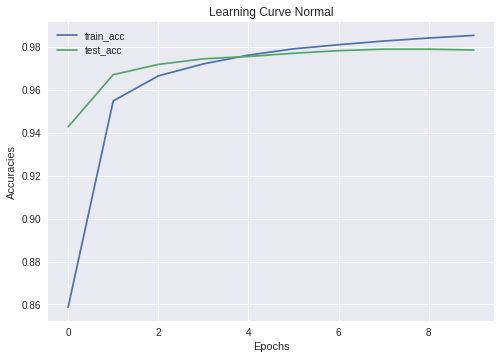

In [0]:
plt.plot(train_accs, label='train_acc')
plt.plot(test_accs, label='test_acc')
plt.ylabel('Accuracies')
plt.xlabel('Epochs')
plt.title('Learning Curve Normal')
plt.legend()
plt.show()

Optimal MNIST model

In [0]:
def conv_layer(input_tensor, filters=64, kernel_size=(3,3)):
  return tf.layers.conv2d(inputs=input_tensor, filters=64, \
        kernel_size=(3, 3), padding="same", activation=None, data_format = "channels_last")
def norm_func(input_tensor):
    # Batch Normalization
    return tf.layers.batch_normalization(input_tensor, training=True)
def relu_func(input_tensor):
    # ReLu Non-linear activation function
    return tf.nn.relu(input_tensor)
def sigmoid_func(input_tensor):
    return tf.nn.sigmoid(input_tensor)
def conv_block(input_tensor, filters=64, kernel_size=(3, 3)):
    # Returns the result of one ConvBlock (convolutional layer + batch normalization + ReLu)
    return relu_func(norm_func(conv_layer(input_tensor, filters, kernel_size)))
def res_block(input_tensor, number1=64, size1=(3,3), number2=128, size2=(3,3)):
    # Returns the result of one ResBlock (ConvBlock + convolutional layer + batch normalization + summation + ReLu)
    return relu_func(sum_func(norm_func(conv_layer(conv_block(input_tensor, \
        number1, size1), number2, size2)), input_tensor))
def sum_func(data1, data2):
    # Element-wise addition of two feature maps, channel by channel.
    # If one feature map is larger, we downsample it using max pooling
    # If one feature map has more channels, we increase its size using zero padding
    if data1.shape[1].value > data2.shape[1].value:
        data1 = max_pool_layer(data1)
        return sum_func(data1, data2)
    elif data1.shape[1].value < data2.shape[1].value:
        data2 = max_pool_layer(data2)
        return sum_func(data1, data2)
    else:
        diff = data1.shape[3].value - data2.shape[3].value
        if diff > 0:
            data2 = tf.pad(data2, tf.constant([[0, 0], [0, 0], [0, 0], [0, diff]]), "CONSTANT")
        elif diff < 0:
            data1 = tf.pad(data1, tf.constant([[0, 0], [0, 0], [0, 0], [0, (-diff)]]), "CONSTANT")
        else:
            pass
        out = tf.add(data1, data2)
        return out
def max_pool_layer(input_tensor):
    # Pooling Layer #1
    # First max pooling layer with a 2x2 filter and stride of 2
    if input_tensor.shape[1].value == 1:
        return input_tensor
    #max_pool = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2, padding="valid")(input_tensor)
    return tf.layers.max_pooling2d(inputs=input_tensor, pool_size=[2, 2], strides=2)
#
#
def avg_pool_layer(input_tensor):
#    avg_pool = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2, padding="valid")(input_tensor)
    return tf.layers.average_pooling2d(inputs=input_tensor, pool_size=[2,2], strides=2)
def concat_func(data1, data2):
    # Concatenates two feature maps in the channel dimension
    # If one feature map is larger, we downsample it using max pooling
    if data1.shape[1].value > data2.shape[1].value:
        data1 = max_pool_layer(data1)
        return concat_func(data1, data2)
    elif data1.shape[1].value < data2.shape[1].value:
        data2 = max_pool_layer(data2)
        return concat_func(data1, data2)
    else:
        return tf.concat([data1, data2], 3)

In [0]:
input_data = tf.placeholder(tf.float32, [None, 28, 28, 1])
input_labels = tf.placeholder(tf.int64, [None])
base_learning_rate = 0.05

concat_1 = concat_func(input_data, input_data)
concat_2 = concat_func(concat_1, concat_1)
conv_block_1 = conv_block(concat_2)
res_block_1 = res_block(conv_block_1)
input_pool = max_pool_layer(input_data)
concat_3 = concat_func(res_block_1, input_pool)
conv_block_2 = conv_block(concat_3)

flattened_output = tf.layers.flatten(conv_block_2)
dense1 = tf.layers.dense(inputs=flattened_output, units=128, activation=tf.nn.relu)
# dense2 = tf.layers.dense(inputs=dense1, units=128, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=dense1, units=10)

predictions = tf.nn.softmax(logits)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
    (labels=tf.one_hot(input_labels, 10), logits=logits))

global_step = tf.Variable(0, trainable=False, name='global_step')

learning_rate = tf.train.exponential_decay(base_learning_rate, global_step,
                                           800, 0.95, staircase=True)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
optimizer = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.argmax(predictions,1), input_labels)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [0]:
num_examples = X_train.shape[0]
train_accs = []
test_accs = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    n_epochs = 50 # number of epochs to run for while training
    batch_size = 128 # size of the batch
    
    for epoch in range(n_epochs):
        print('At epoch {}'.format(epoch))
        epoch_loss = 0 # holds cumulative loss over the epoch
        # will hold predictions for training data at this epoch
        c = 0 # will count the number of batches
        train_acc_sum = 0.0
        for i in range(0, num_examples, batch_size):
            x_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]
            train_loss, _, train_acc = sess.run([loss, optimizer, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})

            epoch_loss += train_loss
            c += 1
            train_acc_sum += train_acc
#             print('Have fed: {}/{}. train_loss: {} and train_acc: {}'\
#                 .format(i, num_examples, train_loss, train_acc))
        print('epoch_loss: {}'.format(epoch_loss))
        train_accs.append(train_acc_sum * 1.0 / c)
        print('Checking test set statistics at end of epoch')
        test_loss, test_acc = sess.run([loss, accuracy], \
            feed_dict={input_data: X_test, input_labels: y_test})
        print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))
        test_accs.append(test_acc)
#         if test_acc > best_test_acc:
#             saver.save(sess, \
#                 'mnist_models/mnist_{}_{}'.format(epoch, test_acc).replace('.', '_'))
#             best_test_acc = test_acc

    print('\n\nFinal test set statistics')
    test_loss, test_acc = sess.run([loss, accuracy], \
            feed_dict={input_data: X_test, input_labels: y_test})

    print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))

At epoch 0
epoch_loss: 76.2844980003
Checking test set statistics at end of epoch
test_loss: 0.0528349727392 and test_acc: 0.983399987221
At epoch 1
epoch_loss: 21.7151197612
Checking test set statistics at end of epoch
test_loss: 0.037394605577 and test_acc: 0.988099992275
At epoch 2
epoch_loss: 14.7674177749
Checking test set statistics at end of epoch
test_loss: 0.042909771204 and test_acc: 0.987200021744
At epoch 3
epoch_loss: 13.109876022
Checking test set statistics at end of epoch
test_loss: 0.0426839217544 and test_acc: 0.988200008869
At epoch 4
epoch_loss: 9.1419513384
Checking test set statistics at end of epoch
test_loss: 0.0564038455486 and test_acc: 0.987299978733
At epoch 5
epoch_loss: 7.73171815803
Checking test set statistics at end of epoch
test_loss: 0.0510799400508 and test_acc: 0.986999988556
At epoch 6
epoch_loss: 6.40616978245
Checking test set statistics at end of epoch
test_loss: 0.0440635457635 and test_acc: 0.989400029182
At epoch 7
epoch_loss: 5.64927296826
C

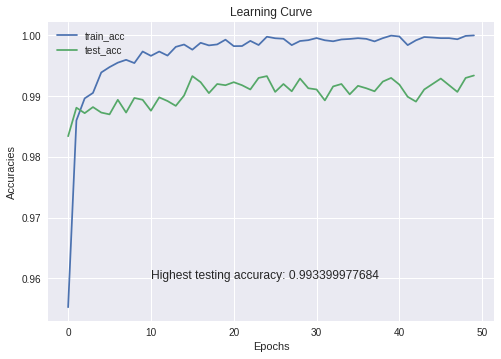

In [0]:
plt.plot(train_accs, label='train_acc')
plt.plot(test_accs, label='test_acc')
plt.ylabel('Accuracies')
plt.xlabel('Epochs')
plt.title('Learning Curve')
plt.text(10, 0.96, 'Highest testing accuracy: {}'.format(max(test_accs)))
plt.legend()
plt.show()

MNIST with dataset augmentation

In [0]:
def flip_lr(img):
  return np.fliplr(img)
def rotate(img):
  rand_angle = np.random.choice(np.arange(-20, 20), 1)[0]
#   to_reshape = np.random.choice([True, False], 1)[0]
  return (ndimage.rotate(img[:, :, 0], rand_angle, reshape=False)).reshape((28, 28, 1))
def blur_img(img):
  sigmas = [0.0, 0.1, 0.2, 0.3, 0.4]
  sigma = np.random.choice(sigmas, 1)[0]
  return (filters.gaussian(img[:, :, 0], sigma=sigma, mode='mirror')).reshape((28, 28, 1))
def hist_norm(img):
  return (exposure.equalize_hist(img[:, :, 0], nbins=32)).reshape((28, 28, 1))
def invert_im(img):
  return (1 - img[:, :, 0]).reshape((28, 28, 1))
def augment_image(img):
  ret_im = np.array(img)
  rand_val = np.random.random()
  if rand_val < 0.05:
    return img
  rand_val = np.random.random()
  if rand_val < 0.5:
    ret_im = invert_im(ret_im)
  rand_val = np.random.random()
  if rand_val < 0.5:
    ret_im = rotate(ret_im)
  rand_val = np.random.random()
  if rand_val < 0.5:
    ret_im = blur_img(ret_im)
  rand_val = np.random.random()
  if rand_val < 0.2:
    ret_im = hist_norm(ret_im)
  return ret_im

In [0]:
input_data = tf.placeholder(tf.float32, [None, 28, 28, 1])
input_labels = tf.placeholder(tf.int64, [None])
base_learning_rate = 0.05

concat_1 = concat_func(input_data, input_data)
concat_2 = concat_func(concat_1, concat_1)
conv_block_1 = conv_block(concat_2)
res_block_1 = res_block(conv_block_1)
input_pool = max_pool_layer(input_data)
concat_3 = concat_func(res_block_1, input_pool)
conv_block_2 = conv_block(concat_3)

flattened_output = tf.layers.flatten(conv_block_2)
dense1 = tf.layers.dense(inputs=flattened_output, units=128, activation=tf.nn.relu)
# dense2 = tf.layers.dense(inputs=dense1, units=128, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=dense1, units=10)

predictions = tf.nn.softmax(logits)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
    (labels=tf.one_hot(input_labels, 10), logits=logits))

global_step = tf.Variable(0, trainable=False, name='global_step')

learning_rate = tf.train.exponential_decay(base_learning_rate, global_step,
                                           800, 0.95, staircase=True)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
optimizer = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.argmax(predictions,1), input_labels)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [0]:
num_examples = X_train.shape[0]
train_accs = []
test_accs = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    n_epochs = 200 # number of epochs to run for while training
    batch_size = 128 # size of the batch
    
    for epoch in range(n_epochs):
        print('At epoch {}'.format(epoch))
        epoch_loss = 0 # holds cumulative loss over the epoch
        # will hold predictions for training data at this epoch
        c = 0 # will count the number of batches
        train_acc_sum = 0.0
        for i in range(0, num_examples, batch_size):
            x_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]
            x_batch = np.array([augment_image(img) for img in x_batch])

            train_loss, _, train_acc = sess.run([loss, optimizer, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})

            epoch_loss += train_loss
            c += 1
            train_acc_sum += train_acc
#             print('Have fed: {}/{}. train_loss: {} and train_acc: {}'\
#                 .format(i, num_examples, train_loss, train_acc))
        print('epoch_loss: {}'.format(epoch_loss))
        train_accs.append(train_acc_sum * 1.0 / c)
        print('Checking test set statistics at end of epoch')
        c = 0
        test_acc_sum = 0.0
        test_num = X_test.shape[0]
        test_batch_size = 200
        for i in range(0, test_num, test_batch_size):
            x_batch, y_batch = X_test[i:i+test_batch_size], y_test[i:i+test_batch_size]
            test_loss, test_acc = sess.run([loss, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})
            c += 1
            test_acc_sum += test_acc
        test_acc = test_acc_sum * 1.0 / c
        print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))
        test_accs.append(test_acc)
#         if test_acc > best_test_acc:
#             saver.save(sess, \
#                 'mnist_models/mnist_{}_{}'.format(epoch, test_acc).replace('.', '_'))
#             best_test_acc = test_acc

#     print('\n\nFinal test set statistics')
#     test_loss, test_acc = sess.run([loss, accuracy], \
#             feed_dict={input_data: X_test, input_labels: y_test})

#     print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))

At epoch 0
epoch_loss: 137.62482307
Checking test set statistics at end of epoch
test_loss: 0.10143173486 and test_acc: 0.976200006008
At epoch 1
epoch_loss: 42.7994432296
Checking test set statistics at end of epoch
test_loss: 0.0351932793856 and test_acc: 0.981200008392
At epoch 2
epoch_loss: 32.6549654012
Checking test set statistics at end of epoch
test_loss: 0.0289440229535 and test_acc: 0.987100009918
At epoch 3
epoch_loss: 27.2657707736
Checking test set statistics at end of epoch
test_loss: 0.0263962335885 and test_acc: 0.988300008774
At epoch 4
epoch_loss: 23.2034349416
Checking test set statistics at end of epoch
test_loss: 0.0145519245416 and test_acc: 0.989100006819
At epoch 5
epoch_loss: 22.3393174491
Checking test set statistics at end of epoch
test_loss: 0.0170248709619 and test_acc: 0.989200007915
At epoch 6
epoch_loss: 19.7391079003
Checking test set statistics at end of epoch
test_loss: 0.0280522387475 and test_acc: 0.989500006437
At epoch 7
epoch_loss: 17.0792663025


KeyboardInterrupt: ignored

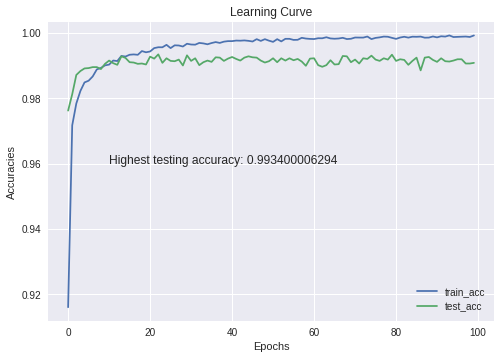

In [0]:
plt.plot(train_accs, label='train_acc')
plt.plot(test_accs, label='test_acc')
plt.ylabel('Accuracies')
plt.xlabel('Epochs')
plt.title('Learning Curve')
plt.text(10, 0.96, 'Highest testing accuracy: {}'.format(max(test_accs)))
plt.legend()
plt.show()

CIFAR-10

In [0]:
train, test = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 50s 0us/step


In [0]:
X_train, y_train = train
X_test, y_test = test

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

Proper One

In [0]:
input_data = tf.placeholder(tf.float32, [None, 32, 32, 3])
input_labels = tf.placeholder(tf.int64, [None])
base_learning_rate = 0.05

conv1 = tf.layers.conv2d(inputs=input_data, filters=16, kernel_size=(3, 3), \
    strides=(2, 2), padding='same', activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=(2, 2), strides=(2, 2), padding='same')
conv2 = tf.layers.conv2d(inputs=pool1, filters=32, kernel_size=(3, 3), \
    strides=(2, 2), padding='same', activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=(2, 2), strides=(2, 2), padding='same')
conv3 = tf.layers.conv2d(inputs=pool2, filters=64, kernel_size=(3, 3), \
    strides=(2, 2), padding='same', activation=tf.nn.relu)
pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=(2, 2), strides=(2, 2), padding='same')
final_output = pool3

flattened_output = tf.layers.flatten(final_output)
dense1 = tf.layers.dense(inputs=flattened_output, units=128, activation=tf.nn.relu)
# dense2 = tf.layers.dense(inputs=dense1, units=128, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=dense1, units=10)

predictions = tf.nn.softmax(logits)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
    (labels=tf.one_hot(input_labels, 10), logits=logits))

global_step = tf.Variable(0, trainable=False, name='global_step')

learning_rate = tf.train.exponential_decay(base_learning_rate, global_step,
                                           800, 0.95, staircase=True)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
optimizer = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.argmax(predictions,1), input_labels)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [0]:
num_examples = X_train.shape[0]
train_accs = []
test_accs = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    n_epochs = 10 # number of epochs to run for while training
    batch_size = 128 # size of the batch
    
    for epoch in range(n_epochs):
        print('At epoch {}'.format(epoch))
        epoch_loss = 0 # holds cumulative loss over the epoch
        # will hold predictions for training data at this epoch
        c = 0 # will count the number of batches
        train_acc_sum = 0.0
        for i in range(0, num_examples, batch_size):
            x_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]
            train_loss, _, train_acc = sess.run([loss, optimizer, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})

            epoch_loss += train_loss
            c += 1
            train_acc_sum += train_acc
#             print('Have fed: {}/{}. train_loss: {} and train_acc: {}'\
#                 .format(i, num_examples, train_loss, train_acc))
        print('epoch_loss: {}'.format(epoch_loss))
        train_accs.append(train_acc_sum * 1.0 / c)
        print('Checking test set statistics at end of epoch')
        test_loss, test_acc = sess.run([loss, accuracy], \
            feed_dict={input_data: X_test, input_labels: y_test})
        print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))
        test_accs.append(test_acc)
#         if test_acc > best_test_acc:
#             saver.save(sess, \
#                 'mnist_models/mnist_{}_{}'.format(epoch, test_acc).replace('.', '_'))
#             best_test_acc = test_acc

    print('\n\nFinal test set statistics')
    test_loss, test_acc = sess.run([loss, accuracy], \
            feed_dict={input_data: X_test, input_labels: y_test})

    print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))

At epoch 0
epoch_loss: 714.294180632
Checking test set statistics at end of epoch
test_loss: 1.59079086781 and test_acc: 0.413599997759
At epoch 1
epoch_loss: 601.260047078
Checking test set statistics at end of epoch
test_loss: 1.47299826145 and test_acc: 0.462000012398
At epoch 2
epoch_loss: 564.096159697
Checking test set statistics at end of epoch
test_loss: 1.40368545055 and test_acc: 0.492700010538
At epoch 3
epoch_loss: 535.79377079
Checking test set statistics at end of epoch
test_loss: 1.34320747852 and test_acc: 0.517499983311
At epoch 4
epoch_loss: 514.877980828
Checking test set statistics at end of epoch
test_loss: 1.31309223175 and test_acc: 0.531599998474
At epoch 5
epoch_loss: 498.346220255
Checking test set statistics at end of epoch
test_loss: 1.2844132185 and test_acc: 0.542999982834
At epoch 6
epoch_loss: 484.688256145
Checking test set statistics at end of epoch
test_loss: 1.26086592674 and test_acc: 0.550700008869
At epoch 7
epoch_loss: 473.247793555
Checking test

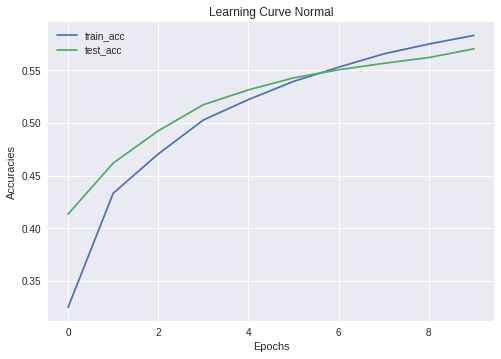

In [0]:
plt.plot(train_accs, label='train_acc')
plt.plot(test_accs, label='test_acc')
plt.ylabel('Accuracies')
plt.xlabel('Epochs')
plt.title('Learning Curve Normal')
plt.legend()
plt.show()

Weird One

In [0]:
input_data = tf.placeholder(tf.float32, [None, 32, 32, 3])
input_labels = tf.placeholder(tf.int64, [None])
base_learning_rate = 0.01

conv133 = tf.layers.conv2d(inputs=input_data, filters=32, kernel_size=(3, 3), \
    strides=(2, 2), padding='same', activation=tf.nn.relu)
pool133 = tf.layers.max_pooling2d(inputs=conv133, pool_size=(2, 2), \
    strides=(2, 2), padding='same')
conv155 = tf.layers.conv2d(inputs=input_data, filters=16, kernel_size=(5, 5), \
    strides=(2, 2), padding='same', activation=tf.nn.relu)
pool155 = tf.layers.max_pooling2d(inputs=conv155, pool_size=(2, 2), \
    strides=(2, 2), padding='same')
conv177 = tf.layers.conv2d(inputs=input_data, filters=8, kernel_size=(7, 7), \
    strides=(2, 2), padding='same', activation=tf.nn.relu)
pool177 = tf.layers.max_pooling2d(inputs=conv177, pool_size=(2, 2), \
    strides=(2, 2), padding='same')
conv111 = tf.layers.conv2d(inputs=input_data, filters=64, kernel_size=(1, 1), \
    strides=(2, 2), padding='same', activation=tf.nn.relu)
pool111 = tf.layers.max_pooling2d(inputs=conv111, pool_size=(2, 2), \
    strides=(2, 2), padding='same')
concat_conv = tf.concat(values=[pool133, pool155, pool177, pool111], axis=3)

conv_final = tf.layers.conv2d(inputs=concat_conv, filters=128, kernel_size=(3, 3), \
    strides=(2, 2), padding='same', activation=tf.nn.relu)
pool_final = tf.layers.max_pooling2d(inputs=conv_final, pool_size=(2, 2), \
    strides=(2, 2), padding='same')

flattened_output = tf.layers.flatten(pool_final)
dense1 = tf.layers.dense(inputs=flattened_output, units=128, \
    activation=tf.nn.relu, kernel_regularizer=None)
# dense2 = tf.layers.dense(inputs=dense1, units=128, \
#     activation=tf.nn.relu, kernel_regularizer=None)
# dense2 = tf.layers.dense(inputs=dense1, units=128, \
#     activation=tf.nn.relu, kernel_regularizer=tf.contrib.layers.l2_regularizer(10e-9))
logits = tf.layers.dense(inputs=dense1, units=10)

predictions = tf.nn.softmax(logits)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
    (labels=tf.one_hot(input_labels, 10), logits=logits))
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
#     (labels=tf.one_hot(input_labels, 10), logits=logits)) \
#      + tf.losses.get_regularization_loss()

global_step = tf.Variable(0, trainable=False, name='global_step')

learning_rate = tf.train.exponential_decay(base_learning_rate, global_step,
                                           800, 0.97, staircase=True)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
optimizer = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.argmax(predictions,1), input_labels)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [0]:
num_examples = X_train.shape[0]
train_accs = []
test_accs = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    n_epochs = 10 # number of epochs to run for while training
    batch_size = 128 # size of the batch
    
    for epoch in range(n_epochs):
        print('At epoch {}'.format(epoch))
        epoch_loss = 0 # holds cumulative loss over the epoch
        # will hold predictions for training data at this epoch
        c = 0 # will count the number of batches
        train_acc_sum = 0.0
        for i in range(0, num_examples, batch_size):
            x_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]
            train_loss, _, train_acc = sess.run([loss, optimizer, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})

            epoch_loss += train_loss
            c += 1
            train_acc_sum += train_acc
#             print('Have fed: {}/{}. train_loss: {} and train_acc: {}'\
#                 .format(i, num_examples, train_loss, train_acc))
        print('epoch_loss: {}'.format(epoch_loss))
        train_accs.append(train_acc_sum * 1.0 / c)
        print('Checking test set statistics at end of epoch')
        test_loss, test_acc = sess.run([loss, accuracy], \
            feed_dict={input_data: X_test, input_labels: y_test})
        print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))
        test_accs.append(test_acc)
#         if test_acc > best_test_acc:
#             saver.save(sess, \
#                 'mnist_models/mnist_{}_{}'.format(epoch, test_acc).replace('.', '_'))
#             best_test_acc = test_acc

    print('\n\nFinal test set statistics')
    test_loss, test_acc = sess.run([loss, accuracy], \
            feed_dict={input_data: X_test, input_labels: y_test})

    print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))

At epoch 0
epoch_loss: 635.441402197
Checking test set statistics at end of epoch
test_loss: 1.36020064354 and test_acc: 0.509500026703
At epoch 1
epoch_loss: 493.603203058
Checking test set statistics at end of epoch
test_loss: 1.20628511906 and test_acc: 0.577099978924
At epoch 2
epoch_loss: 436.848213911
Checking test set statistics at end of epoch
test_loss: 1.12581133842 and test_acc: 0.605799973011
At epoch 3
epoch_loss: 396.968931496
Checking test set statistics at end of epoch
test_loss: 1.06610298157 and test_acc: 0.627399981022
At epoch 4
epoch_loss: 367.182849765
Checking test set statistics at end of epoch
test_loss: 1.03723537922 and test_acc: 0.63789999485
At epoch 5
epoch_loss: 344.138755262
Checking test set statistics at end of epoch
test_loss: 0.982288360596 and test_acc: 0.658900022507
At epoch 6
epoch_loss: 326.37972182
Checking test set statistics at end of epoch
test_loss: 0.954278111458 and test_acc: 0.667299985886
At epoch 7
epoch_loss: 312.23278296
Checking tes

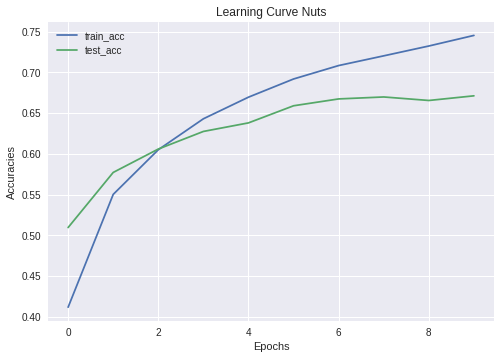

In [0]:
plt.plot(train_accs, label='train_acc')
plt.plot(test_accs, label='test_acc')
plt.ylabel('Accuracies')
plt.xlabel('Epochs')
plt.title('Learning Curve Nuts')
plt.legend()
plt.show()

Optimal Model

In [0]:
input_data = tf.placeholder(tf.float32, [None, 32, 32, 3])
input_labels = tf.placeholder(tf.int64, [None])
base_learning_rate = 0.5

res1 = res_block(input_data)
conv1 = conv_layer(res1)
pool1 = max_pool_layer(conv1)
pool2 = max_pool_layer(pool1)
res2 = res_block(pool2)
pool3 = max_pool_layer(res2)
pool4 = avg_pool_layer(pool3)


flattened_output = tf.layers.flatten(pool4)
dense1 = tf.layers.dense(inputs=flattened_output, units=128, \
    activation=tf.nn.relu, kernel_regularizer=None)
logits = tf.layers.dense(inputs=dense1, units=10)

predictions = tf.nn.softmax(logits)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
    (labels=tf.one_hot(input_labels, 10), logits=logits))
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
#     (labels=tf.one_hot(input_labels, 10), logits=logits)) \
#      + tf.losses.get_regularization_loss()

global_step = tf.Variable(0, trainable=False, name='global_step')

learning_rate = tf.train.exponential_decay(base_learning_rate, global_step,
                                           800, 0.97, staircase=True)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
optimizer = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.argmax(predictions,1), input_labels)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [0]:
num_examples = X_train.shape[0]
train_accs = []
test_accs = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    n_epochs = 100 # number of epochs to run for while training
    batch_size = 128 # size of the batch
    
    for epoch in range(n_epochs):
        print('At epoch {}'.format(epoch))
        epoch_loss = 0 # holds cumulative loss over the epoch
        # will hold predictions for training data at this epoch
        c = 0 # will count the number of batches
        train_acc_sum = 0.0
        for i in range(0, num_examples, batch_size):
            x_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]
            train_loss, _, train_acc = sess.run([loss, optimizer, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})

            epoch_loss += train_loss
            c += 1
            train_acc_sum += train_acc
#             print('Have fed: {}/{}. train_loss: {} and train_acc: {}'\
#                 .format(i, num_examples, train_loss, train_acc))
        print('epoch_loss: {}'.format(epoch_loss))
        train_accs.append(train_acc_sum * 1.0 / c)
        print('Checking test set statistics at end of epoch')
        c = 0
        test_acc_sum = 0.0
        test_num = X_test.shape[0]
        for i in range(0, test_num, batch_size):
            x_batch, y_batch = X_test[i:i+batch_size], y_test[i:i+batch_size]
            test_loss, test_acc = sess.run([loss, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})
            c += 1
            test_acc_sum += test_acc
        test_acc = test_acc_sum * 1.0 / c
        print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))
        test_accs.append(test_acc)
#         if test_acc > best_test_acc:
#             saver.save(sess, \
#                 'mnist_models/mnist_{}_{}'.format(epoch, test_acc).replace('.', '_'))
#             best_test_acc = test_acc

#     print('\n\nFinal test set statistics')
#     test_loss, test_acc = sess.run([loss, accuracy], \
#             feed_dict={input_data: X_test, input_labels: y_test})

#     print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))

At epoch 0
epoch_loss: 488.729152679
Checking test set statistics at end of epoch
test_loss: 0.953528285027 and test_acc: 0.675237341772
At epoch 1
epoch_loss: 315.826596081
Checking test set statistics at end of epoch
test_loss: 0.881768703461 and test_acc: 0.73378164557
At epoch 2
epoch_loss: 257.384955287
Checking test set statistics at end of epoch
test_loss: 0.869013786316 and test_acc: 0.752768987342
At epoch 3
epoch_loss: 219.436696082
Checking test set statistics at end of epoch
test_loss: 0.776464283466 and test_acc: 0.7734375
At epoch 4
epoch_loss: 190.6702483
Checking test set statistics at end of epoch
test_loss: 0.759043812752 and test_acc: 0.778481012658
At epoch 5
epoch_loss: 168.069115609
Checking test set statistics at end of epoch
test_loss: 0.838065385818 and test_acc: 0.77363528481
At epoch 6
epoch_loss: 149.228182539
Checking test set statistics at end of epoch
test_loss: 0.780324339867 and test_acc: 0.765723892405
At epoch 7
epoch_loss: 134.159746766
Checking test

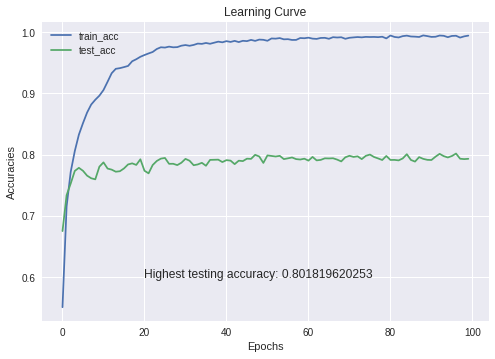

In [0]:
plt.plot(train_accs, label='train_acc')
plt.plot(test_accs, label='test_acc')
plt.ylabel('Accuracies')
plt.xlabel('Epochs')
plt.title('Learning Curve')
plt.text(20, 0.6, 'Highest testing accuracy: {}'.format(max(test_accs)))
plt.legend()
plt.show()

25 generations model

In [0]:
input_data = tf.placeholder(tf.float32, [None, 32, 32, 3])
input_labels = tf.placeholder(tf.int64, [None])
base_learning_rate = 0.5

res1 = res_block(input_data)
conv1 = conv_block(res1)
conv2 = conv_layer(conv1)
pool1 = max_pool_layer(conv2)
res2 = res_block(pool1)
conv3 = conv_layer(res2)
pool2 = max_pool_layer(conv3)
conv4 = conv_block(pool2)

flattened_output = tf.layers.flatten(conv4)
dense1 = tf.layers.dense(inputs=flattened_output, units=128, \
    activation=tf.nn.relu, kernel_regularizer=None)
logits = tf.layers.dense(inputs=dense1, units=10)
c
predictions = tf.nn.softmax(logits)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
    (labels=tf.one_hot(input_labels, 10), logits=logits))
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
#     (labels=tf.one_hot(input_labels, 10), logits=logits)) \
#      + tf.losses.get_regularization_loss()

global_step = tf.Variable(0, trainable=False, name='global_step')

learning_rate = tf.train.exponential_decay(base_learning_rate, global_step,
                                           800, 0.97, staircase=True)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
optimizer = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.argmax(predictions,1), input_labels)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [0]:
num_examples = X_train.shape[0]
train_accs = []
test_accs = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    n_epochs = 100 # number of epochs to run for while training
    batch_size = 128 # size of the batch
    
    for epoch in range(n_epochs):
        print('At epoch {}'.format(epoch))
        epoch_loss = 0 # holds cumulative loss over the epoch
        # will hold predictions for training data at this epoch
        c = 0 # will count the number of batches
        train_acc_sum = 0.0
        for i in range(0, num_examples, batch_size):
            x_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]
            train_loss, _, train_acc = sess.run([loss, optimizer, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})

            epoch_loss += train_loss
            c += 1
            train_acc_sum += train_acc
#             print('Have fed: {}/{}. train_loss: {} and train_acc: {}'\
#                 .format(i, num_examples, train_loss, train_acc))
        print('epoch_loss: {}'.format(epoch_loss))
        train_accs.append(train_acc_sum * 1.0 / c)
        print('Checking test set statistics at end of epoch')
        c = 0
        test_acc_sum = 0.0
        test_num = X_test.shape[0]
        for i in range(0, test_num, batch_size):
            x_batch, y_batch = X_test[i:i+batch_size], y_test[i:i+batch_size]
            test_loss, test_acc = sess.run([loss, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})
            c += 1
            test_acc_sum += test_acc
        test_acc = test_acc_sum * 1.0 / c
        print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))
        test_accs.append(test_acc)
#         if test_acc > best_test_acc:
#             saver.save(sess, \
#                 'mnist_models/mnist_{}_{}'.format(epoch, test_acc).replace('.', '_'))
#             best_test_acc = test_acc

#     print('\n\nFinal test set statistics')
#     test_loss, test_acc = sess.run([loss, accuracy], \
#             feed_dict={input_data: X_test, input_labels: y_test})

#     print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))

At epoch 0
epoch_loss: 504.835878313
Checking test set statistics at end of epoch
test_loss: 0.922463595867 and test_acc: 0.678500791139
At epoch 1
epoch_loss: 312.18621856
Checking test set statistics at end of epoch
test_loss: 0.668417811394 and test_acc: 0.731408227848
At epoch 2
epoch_loss: 244.696511328
Checking test set statistics at end of epoch
test_loss: 0.546259045601 and test_acc: 0.766119462025
At epoch 3
epoch_loss: 199.274763554
Checking test set statistics at end of epoch
test_loss: 0.569493710995 and test_acc: 0.778085443038
At epoch 4
epoch_loss: 165.446201771
Checking test set statistics at end of epoch
test_loss: 0.565789937973 and test_acc: 0.78065664557
At epoch 5
epoch_loss: 138.231013581
Checking test set statistics at end of epoch
test_loss: 0.603762507439 and test_acc: 0.766712816456
At epoch 6
epoch_loss: 117.356959611
Checking test set statistics at end of epoch
test_loss: 0.760386824608 and test_acc: 0.771855221519
At epoch 7
epoch_loss: 99.7175029069
Checki

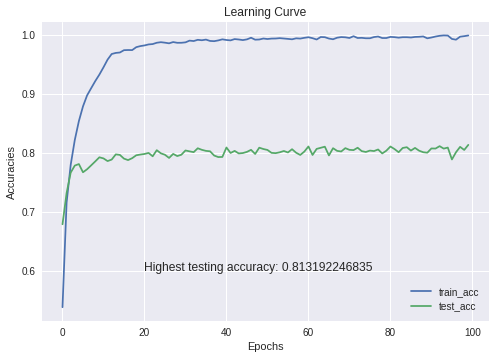

In [0]:
plt.plot(train_accs, label='train_acc')
plt.plot(test_accs, label='test_acc')
plt.ylabel('Accuracies')
plt.xlabel('Epochs')
plt.title('Learning Curve')
plt.text(20, 0.6, 'Highest testing accuracy: {}'.format(max(test_accs)))
plt.legend()
plt.show()

25 generations model with dataset augmentation

In [0]:
input_data = tf.placeholder(tf.float32, [None, 32, 32, 3])
input_labels = tf.placeholder(tf.int64, [None])
base_learning_rate = 0.5

res1 = res_block(input_data)
conv1 = conv_block(res1)
conv2 = conv_layer(conv1)
pool1 = max_pool_layer(conv2)
res2 = res_block(pool1)
conv3 = conv_layer(res2)
pool2 = max_pool_layer(conv3)
conv4 = conv_block(pool2)

flattened_output = tf.layers.flatten(conv4)
dense1 = tf.layers.dense(inputs=flattened_output, units=128, \
    activation=tf.nn.relu, kernel_regularizer=None)
dense2 = tf.layers.dense(inputs=dense1, units=128, \
    activation=tf.nn.relu, kernel_regularizer=None)
logits = tf.layers.dense(inputs=dense2, units=10)

predictions = tf.nn.softmax(logits)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
    (labels=tf.one_hot(input_labels, 10), logits=logits))
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
#     (labels=tf.one_hot(input_labels, 10), logits=logits)) \
#      + tf.losses.get_regularization_loss()

global_step = tf.Variable(0, trainable=False, name='global_step')

learning_rate = tf.train.exponential_decay(base_learning_rate, global_step,
                                           800, 0.97, staircase=True)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
optimizer = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.argmax(predictions,1), input_labels)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [0]:
def flip_lr(img):
  return np.fliplr(img)
def rotate(img):
  rand_angle = np.random.choice(np.arange(-20, 20), 1)[0]
#   to_reshape = np.random.choice([True, False], 1)[0]
  return ndimage.rotate(img, rand_angle, reshape=False)
def blur_img(img):
  sigmas = [0.0, 0.1, 0.2, 0.3, 0.4]
  sigma = np.random.choice(sigmas, 1)[0]
  return filters.gaussian(img, sigma=sigma, mode='mirror')
def hist_norm(img):
  return exposure.equalize_hist(img, nbins=32)
def augment_image(img):
  ret_im = np.array(img)
  rand_val = np.random.random()
  if rand_val < 0.05:
    return img
  rand_val = np.random.random()
  if rand_val < 0.5:
    ret_im = flip_lr(ret_im)
  rand_val = np.random.random()
  if rand_val < 0.5:
    ret_im = rotate(ret_im)
  rand_val = np.random.random()
  if rand_val < 0.5:
    ret_im = blur_img(ret_im)
  rand_val = np.random.random()
  if rand_val < 0.2:
    ret_im = hist_norm(ret_im)
  return ret_im

In [0]:
plt.subplot(121)
plt.imshow(X_train[0])

In [0]:
num_examples = X_train.shape[0]
train_accs = []
test_accs = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    n_epochs = 200 # number of epochs to run for while training
    batch_size = 128 # size of the batch
    
    for epoch in range(n_epochs):
        print('At epoch {}'.format(epoch))
        epoch_loss = 0 # holds cumulative loss over the epoch
        # will hold predictions for training data at this epoch
        c = 0 # will count the number of batches
        train_acc_sum = 0.0
        for i in range(0, num_examples, batch_size):
            x_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]
            x_batch = np.array([augment_image(img) for img in x_batch])

            train_loss, _, train_acc = sess.run([loss, optimizer, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})

            epoch_loss += train_loss
            c += 1
            train_acc_sum += train_acc
#             print('Have fed: {}/{}. train_loss: {} and train_acc: {}'\
#                 .format(i, num_examples, train_loss, train_acc))
        print('epoch_loss: {}'.format(epoch_loss))
        train_accs.append(train_acc_sum * 1.0 / c)
        print('Checking test set statistics at end of epoch')
        c = 0
        test_acc_sum = 0.0
        test_num = X_test.shape[0]
        test_batch_size = 200
        for i in range(0, test_num, test_batch_size):
            x_batch, y_batch = X_test[i:i+test_batch_size], y_test[i:i+test_batch_size]
            test_loss, test_acc = sess.run([loss, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})
            c += 1
            test_acc_sum += test_acc
        test_acc = test_acc_sum * 1.0 / c
        print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))
        test_accs.append(test_acc)
#         if test_acc > best_test_acc:
#             saver.save(sess, \
#                 'mnist_models/mnist_{}_{}'.format(epoch, test_acc).replace('.', '_'))
#             best_test_acc = test_acc

#     print('\n\nFinal test set statistics')
#     test_loss, test_acc = sess.run([loss, accuracy], \
#             feed_dict={input_data: X_test, input_labels: y_test})

#     print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))

At epoch 0
epoch_loss: 517.508256257
Checking test set statistics at end of epoch
test_loss: 0.956575036049 and test_acc: 0.659699997902
At epoch 1
epoch_loss: 351.192824602
Checking test set statistics at end of epoch
test_loss: 0.845593214035 and test_acc: 0.728500003815
At epoch 2
epoch_loss: 293.828637451
Checking test set statistics at end of epoch
test_loss: 0.731379270554 and test_acc: 0.762900000811
At epoch 3
epoch_loss: 260.760511458
Checking test set statistics at end of epoch
test_loss: 0.704953849316 and test_acc: 0.780599999428
At epoch 4
epoch_loss: 238.726472765
Checking test set statistics at end of epoch
test_loss: 0.6278398633 and test_acc: 0.8025
At epoch 5
epoch_loss: 221.0983046
Checking test set statistics at end of epoch
test_loss: 0.664870142937 and test_acc: 0.805500000715
At epoch 6
epoch_loss: 203.378619134
Checking test set statistics at end of epoch
test_loss: 0.627068161964 and test_acc: 0.815899995565
At epoch 7
epoch_loss: 191.098954916
Checking test se

KeyboardInterrupt: ignored

In [0]:
plt.plot(train_accs, label='train_acc')
plt.plot(test_accs, label='test_acc')
plt.ylabel('Accuracies')
plt.xlabel('Epochs')
plt.title('Learning Curve')
plt.text(20, 0.6, 'Highest testing accuracy: {}'.format(max(test_accs)))
plt.legend()
plt.show()

CIFAR-100

In [0]:
train, test = tf.keras.datasets.cifar100.load_data()

169017344/169001437 [==============================] - 5s 0us/step


In [0]:
X_train, y_train = train
X_test, y_test = test

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

In [0]:
input_data = tf.placeholder(tf.float32, [None, 32, 32, 3])
input_labels = tf.placeholder(tf.int64, [None])
base_learning_rate = 0.5

res1 = res_block(input_data)
conv1 = conv_block(res1)
conv2 = conv_layer(conv1)
pool1 = max_pool_layer(conv2)
res2 = res_block(pool1)
conv3 = conv_layer(res2)
pool2 = max_pool_layer(conv3)
conv4 = conv_block(pool2)

flattened_output = tf.layers.flatten(conv4)
dense1 = tf.layers.dense(inputs=flattened_output, units=512, \
    activation=tf.nn.relu, kernel_regularizer=None)
logits = tf.layers.dense(inputs=dense1, units=100)

predictions = tf.nn.softmax(logits)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
    (labels=tf.one_hot(input_labels, 100), logits=logits))
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
#     (labels=tf.one_hot(input_labels, 10), logits=logits)) \
#      + tf.losses.get_regularization_loss()

global_step = tf.Variable(0, trainable=False, name='global_step')

learning_rate = tf.train.exponential_decay(base_learning_rate, global_step,
                                           800, 0.97, staircase=True)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
optimizer = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.argmax(predictions,1), input_labels)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
num_examples = X_train.shape[0]
train_accs = []
test_accs = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    n_epochs = 200 # number of epochs to run for while training
    batch_size = 128 # size of the batch
    
    for epoch in range(n_epochs):
        print('At epoch {}'.format(epoch))
        epoch_loss = 0 # holds cumulative loss over the epoch
        # will hold predictions for training data at this epoch
        c = 0 # will count the number of batches
        train_acc_sum = 0.0
        for i in range(0, num_examples, batch_size):
            x_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]
            x_batch = np.array([augment_image(img) for img in x_batch])

            train_loss, _, train_acc = sess.run([loss, optimizer, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})

            epoch_loss += train_loss
            c += 1
            train_acc_sum += train_acc
#             print('Have fed: {}/{}. train_loss: {} and train_acc: {}'\
#                 .format(i, num_examples, train_loss, train_acc))
        print('epoch_loss: {}'.format(epoch_loss))
        train_accs.append(train_acc_sum * 1.0 / c)
        print('Checking test set statistics at end of epoch')
        c = 0
        test_acc_sum = 0.0
        test_num = X_test.shape[0]
        test_batch_size = 200
        for i in range(0, test_num, test_batch_size):
            x_batch, y_batch = X_test[i:i+test_batch_size], y_test[i:i+test_batch_size]
            test_loss, test_acc = sess.run([loss, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})
            c += 1
            test_acc_sum += test_acc
        test_acc = test_acc_sum * 1.0 / c
        print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))
        test_accs.append(test_acc)
#         if test_acc > best_test_acc:
#             saver.save(sess, \
#                 'mnist_models/mnist_{}_{}'.format(epoch, test_acc).replace('.', '_'))
#             best_test_acc = test_acc

#     print('\n\nFinal test set statistics')
#     test_loss, test_acc = sess.run([loss, accuracy], \
#             feed_dict={input_data: X_test, input_labels: y_test})

#     print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))

At epoch 0
epoch_loss: 1419.6652236
Checking test set statistics at end of epoch
test_loss: 2.99113821983 and test_acc: 0.257699997425
At epoch 1
epoch_loss: 1116.08783984
Checking test set statistics at end of epoch
test_loss: 2.46404457092 and test_acc: 0.344700001478
At epoch 2
epoch_loss: 949.889885783
Checking test set statistics at end of epoch
test_loss: 2.17649149895 and test_acc: 0.413499999046
At epoch 3
epoch_loss: 844.134651184
Checking test set statistics at end of epoch
test_loss: 1.9723212719 and test_acc: 0.455999999046
At epoch 4
epoch_loss: 772.828700066
Checking test set statistics at end of epoch
test_loss: 1.9057945013 and test_acc: 0.476199996471
At epoch 5
epoch_loss: 712.691652179
Checking test set statistics at end of epoch
test_loss: 1.81827545166 and test_acc: 0.494199998975
At epoch 6
epoch_loss: 663.741551042
Checking test set statistics at end of epoch
test_loss: 1.79718279839 and test_acc: 0.507399998903
At epoch 7
epoch_loss: 627.424456596
Checking test 

KeyboardInterrupt: ignored

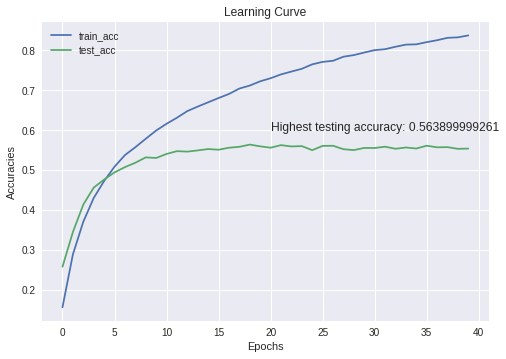

In [0]:
plt.plot(train_accs, label='train_acc')
plt.plot(test_accs, label='test_acc')
plt.ylabel('Accuracies')
plt.xlabel('Epochs')
plt.title('Learning Curve')
plt.text(20, 0.6, 'Highest testing accuracy: {}'.format(max(test_accs)))
plt.legend()
plt.show()

FINAL PRESENTATION

In [0]:
def conv_layer(input_tensor, filters=64, kernel_size=3):
    kernel_size = (kernel_size, kernel_size)
    # Convolutional Layer
    # Computes 32 features using a 5x5 filter with ReLU activation.
    # Padding is added to preserve width and height.
    return tf.layers.conv2d(inputs=input_tensor, filters=filters, \
        kernel_size=kernel_size, padding="same", activation=None, data_format = "channels_last")
def max_pool_layer(input_tensor):
    # Pooling Layer #1
    # First max pooling layer with a 2x2 filter and stride of 2
    if input_tensor.shape[1].value == 1:
        return input_tensor
    #max_pool = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2, padding="valid")(input_tensor)
    return tf.layers.max_pooling2d(inputs=input_tensor, pool_size=[2, 2], strides=2)
def avg_pool_layer(input_tensor):
#    avg_pool = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2, padding="valid")(input_tensor)
    return tf.layers.average_pooling2d(inputs=input_tensor, pool_size=[2,2], strides=2)
def dense_layer(input_tensor, num_units=128):
    # Flatten tensor into a batch of vectors
    pool2_flat = tf.layers.Flatten()(input_tensor)
    # Densely connected layer with 1024 neurons
    logits = tf.layers.dense(inputs=pool2_flat, units=num_units, activation=tf.nn.relu)
    return logits
def norm_func(input_tensor):
    # Batch Normalization
    return tf.layers.batch_normalization(input_tensor, training=True)
def relu_func(input_tensor):
    # ReLu Non-linear activation function
    return tf.nn.relu(input_tensor)
def concat_func(data1, data2):
    # Concatenates two feature maps in the channel dimension
    # If one feature map is larger, we downsample it using max pooling
    if data1.shape[1].value > data2.shape[1].value:
        data1 = max_pool_layer(data1)
        return concat_func(data1, data2)
    elif data1.shape[1].value < data2.shape[1].value:
        data2 = max_pool_layer(data2)
        return concat_func(data1, data2)
    else:
        return tf.concat([data1, data2], 3)      
def sum_func(data1, data2):
    # Element-wise addition of two feature maps, channel by channel.
    # If one feature map is larger, we downsample it using max pooling
    # If one feature map has more channels, we increase its size using zero padding
    if data1.shape[1].value > data2.shape[1].value:
        data1 = max_pool_layer(data1)
        return sum_func(data1, data2)
    elif data1.shape[1].value < data2.shape[1].value:
        data2 = max_pool_layer(data2)
        return sum_func(data1, data2)
    else:
        diff = data1.shape[3].value - data2.shape[3].value
        if diff > 0:
            data2 = tf.pad(data2, tf.constant([[0, 0], [0, 0], [0, 0], [0, diff]]), "CONSTANT")
        elif diff < 0:
            data1 = tf.pad(data1, tf.constant([[0, 0], [0, 0], [0, 0], [0, (-diff)]]), "CONSTANT")
        else:
            pass
        out = tf.add(data1, data2)
        return out
def sigmoid_func(input_tensor):
    return tf.nn.sigmoid(input_tensor)
def conv_block(input_tensor, filters=64, kernel_size=3):
    # Returns the result of one ConvBlock (convolutional layer + batch normalization + ReLu)
    # kernel_size = (kernel_size, kernel_size)
    return relu_func(norm_func(conv_layer(input_tensor, filters, kernel_size)))
def res_block(input_tensor, number1=64, size1=3, number2=128, size2=3):
    # size1 = (size1, size1)
    # size2 = (size2, size2)
    # Returns the result of one ResBlock (ConvBlock + convolutional layer + batch normalization + summation + ReLu)
    return relu_func(sum_func(norm_func(conv_layer(conv_block(input_tensor, \
        number1, size1), number2, size2)), input_tensor))
def identity_block(input_tensor, filters=64, kernel_size=3):
    # kernel_size = (kernel_size, kernel_size)
    return conv_block(conv_block(conv_block(input_tensor, filters, kernel_size)))

CIFAR-100

In [0]:
train, test = tf.keras.datasets.cifar100.load_data()

169017344/169001437 [==============================] - 12s 0us/step


In [0]:
X_train, y_train = train
X_test, y_test = test

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

In [0]:
def flip_lr(img):
  return np.fliplr(img)
def rotate(img):
  rand_angle = np.random.choice(np.arange(-40, 40), 1)[0]
#   to_reshape = np.random.choice([True, False], 1)[0]
  return ndimage.rotate(img, rand_angle, reshape=False)
def blur_img(img):
  sigmas = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
  sigma = np.random.choice(sigmas, 1)[0]
  return filters.gaussian(img, sigma=sigma, mode='mirror')
def hist_norm(img):
  return exposure.equalize_hist(img, nbins=32)
def augment_image(img):
  ret_im = np.array(img)
  rand_val = np.random.random()
  if rand_val < 0.05:
    return img
  rand_val = np.random.random()
  if rand_val < 0.5:
    ret_im = flip_lr(ret_im)
  rand_val = np.random.random()
  if rand_val < 0.5:
    ret_im = rotate(ret_im)
  rand_val = np.random.random()
  if rand_val < 0.5:
    ret_im = blur_img(ret_im)
  rand_val = np.random.random()
  if rand_val < 0.2:
    ret_im = hist_norm(ret_im)
  return ret_im

/usr/local/lib/python2.7/dist-packages/skimage/filters/_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))
/usr/local/lib/python2.7/dist-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


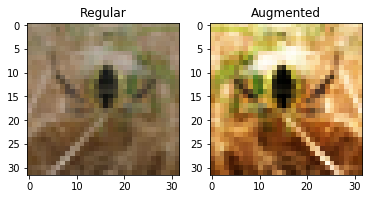

In [0]:
dsn = 157
plt.subplot(121)
plt.title('Regular')
plt.imshow(X_train[dsn])
plt.subplot(122)
plt.title('Augmented')
plt.imshow(augment_image(X_train[dsn]))

In [0]:
input_data = tf.placeholder(tf.float32, [None, 32, 32, 3])
input_labels = tf.placeholder(tf.int64, [None])
base_learning_rate = 0.5

cvl1 = conv_layer(input_data, 32, 3)
ccf1 = concat_func(input_data, cvl1)
res1 = res_block(cvl1, 64, 7, 512, 3)
ib1 = identity_block(res1, 64, 7)
ap1 = avg_pool_layer(ib1)
cvl2 = conv_layer(ib1, 128, 3)
sfn = sum_func(ccf1, ap1)
ccf2 = concat_func(sfn, cvl2)

flattened_output = tf.layers.flatten(ccf2)
# res1 = res_block(input_data)
# conv1 = conv_block(res1)
# conv2 = conv_layer(conv1)
# pool1 = max_pool_layer(conv2)
# res2 = res_block(pool1)
# conv3 = conv_layer(res2)
# pool2 = max_pool_layer(conv3)
# conv4 = conv_block(pool2)

# flattened_output = tf.layers.flatten(conv4)
# convb1 = conv_block(input_data, 128, 5)
# avg1 = avg_pool_layer(convb1)
# maxp1 = max_pool_layer(avg1)


# flattened_output = tf.layers.flatten(maxp1)
dense1 = tf.layers.dense(inputs=flattened_output, units=512, \
    activation=tf.nn.relu, kernel_regularizer=None)
logits = tf.layers.dense(inputs=dense1, units=100)

predictions = tf.nn.softmax(logits)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
    (labels=tf.one_hot(input_labels, 100), logits=logits))
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
#     (labels=tf.one_hot(input_labels, 10), logits=logits)) \
#      + tf.losses.get_regularization_loss()

global_step = tf.Variable(0, trainable=False, name='global_step')

learning_rate = tf.train.exponential_decay(base_learning_rate, global_step,
                                           800, 0.97, staircase=True)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
optimizer = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.argmax(predictions,1), input_labels)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.average_pooling2d instead.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
num_examples = X_train.shape[0]
train_accs = []
test_accs = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    n_epochs = 200 # number of epochs to run for while training
    batch_size = 128 # size of the batch
    
    for epoch in range(n_epochs):
        print('At epoch {}'.format(epoch))
        epoch_loss = 0 # holds cumulative loss over the epoch
        # will hold predictions for training data at this epoch
        c = 0 # will count the number of batches
        train_acc_sum = 0.0
        for i in range(0, num_examples, batch_size):
            x_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]
            x_batch = np.array([augment_image(img) for img in x_batch])

            train_loss, _, train_acc = sess.run([loss, optimizer, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})

            epoch_loss += train_loss
            c += 1
            train_acc_sum += train_acc
#             print('Have fed: {}/{}. train_loss: {} and train_acc: {}'\
#                 .format(i, num_examples, train_loss, train_acc))
        print('epoch_loss: {}'.format(epoch_loss))
        train_accs.append(train_acc_sum * 1.0 / c)
        print('Checking test set statistics at end of epoch')
        c = 0
        test_acc_sum = 0.0
        test_num = X_test.shape[0]
        test_batch_size = 200
        for i in range(0, test_num, test_batch_size):
            x_batch, y_batch = X_test[i:i+test_batch_size], y_test[i:i+test_batch_size]
            test_loss, test_acc = sess.run([loss, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})
            c += 1
            test_acc_sum += test_acc
        test_acc = test_acc_sum * 1.0 / c
        print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))
        test_accs.append(test_acc)
#         if test_acc > best_test_acc:
#             saver.save(sess, \
#                 'mnist_models/mnist_{}_{}'.format(epoch, test_acc).replace('.', '_'))
#             best_test_acc = test_acc

#     print('\n\nFinal test set statistics')
#     test_loss, test_acc = sess.run([loss, accuracy], \
#             feed_dict={input_data: X_test, input_labels: y_test})

#     print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))

At epoch 0
epoch_loss: 1838.15112829
Checking test set statistics at end of epoch
test_loss: 4.22195243835 and test_acc: 0.0546999997273
At epoch 1
epoch_loss: 1581.02502775
Checking test set statistics at end of epoch
test_loss: 3.78142404556 and test_acc: 0.104599999785
At epoch 2
epoch_loss: 1466.55553865
Checking test set statistics at end of epoch
test_loss: 3.48528909683 and test_acc: 0.162299999595
At epoch 3
epoch_loss: 1356.72706461
Checking test set statistics at end of epoch
test_loss: 3.23553562164 and test_acc: 0.210199999809
At epoch 4
epoch_loss: 1262.87545919
Checking test set statistics at end of epoch
test_loss: 2.97122859955 and test_acc: 0.253099997938
At epoch 5
epoch_loss: 1185.76502967
Checking test set statistics at end of epoch
test_loss: 2.7347612381 and test_acc: 0.295200000107
At epoch 6
epoch_loss: 1122.79082203
Checking test set statistics at end of epoch
test_loss: 2.59182047844 and test_acc: 0.316699998379
At epoch 7
epoch_loss: 1071.07885337
Checking te

In [0]:
plt.plot(train_accs, label='train_acc')
plt.plot(test_accs, label='test_acc')
plt.ylabel('Accuracies')
plt.xlabel('Epochs')
plt.title('Learning Curve')
plt.text(20, 0.2, 'Highest testing accuracy: {}'.format(max(test_accs)))
plt.legend()
plt.show()

CIFAR-10

In [0]:
train, test = tf.keras.datasets.cifar10.load_data()

In [0]:
X_train, y_train = train
X_test, y_test = test

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

In [0]:
def flip_lr(img):
  return np.fliplr(img)
def rotate(img):
  rand_angle = np.random.choice(np.arange(-35, 35), 1)[0]
#   to_reshape = np.random.choice([True, False], 1)[0]
  return ndimage.rotate(img, rand_angle, reshape=False)
def blur_img(img):
  sigmas = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
  sigma = np.random.choice(sigmas, 1)[0]
  return filters.gaussian(img, sigma=sigma, mode='mirror')
def hist_norm(img):
  return exposure.equalize_hist(img, nbins=32)
def augment_image(img):
  ret_im = np.array(img)
  rand_val = np.random.random()
  if rand_val < 0.05:
    return img
  rand_val = np.random.random()
  if rand_val < 0.5:
    ret_im = flip_lr(ret_im)
  rand_val = np.random.random()
  if rand_val < 0.5:
    ret_im = rotate(ret_im)
  rand_val = np.random.random()
  if rand_val < 0.5:
    ret_im = blur_img(ret_im)
  rand_val = np.random.random()
  if rand_val < 0.2:
    ret_im = hist_norm(ret_im)
  return ret_im

In [0]:
input_data = tf.placeholder(tf.float32, [None, 32, 32, 3])
input_labels = tf.placeholder(tf.int64, [None])
base_learning_rate = 0.5

res1 = res_block(input_data)
conv1 = conv_block(res1)
conv2 = conv_layer(conv1)
pool1 = max_pool_layer(conv2)
res2 = res_block(pool1)
conv3 = conv_layer(res2)
pool2 = max_pool_layer(conv3)
conv4 = conv_block(pool2)

flattened_output = tf.layers.flatten(conv4)
# convb1 = conv_block(input_data, 128, 5)
# avg1 = avg_pool_layer(convb1)
# maxp1 = max_pool_layer(avg1)


# flattened_output = tf.layers.flatten(maxp1)
dense1 = tf.layers.dense(inputs=flattened_output, units=512, \
    activation=tf.nn.relu, kernel_regularizer=None)
logits = tf.layers.dense(inputs=dense1, units=10)

predictions = tf.nn.softmax(logits)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
    (labels=tf.one_hot(input_labels, 10), logits=logits))
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
#     (labels=tf.one_hot(input_labels, 10), logits=logits)) \
#      + tf.losses.get_regularization_loss()

global_step = tf.Variable(0, trainable=False, name='global_step')

learning_rate = tf.train.exponential_decay(base_learning_rate, global_step,
                                           800, 0.97, staircase=True)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
optimizer = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.argmax(predictions,1), input_labels)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [0]:
num_examples = X_train.shape[0]
train_accs = []
test_accs = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    n_epochs = 400 # number of epochs to run for while training
    batch_size = 128 # size of the batch
    
    for epoch in range(n_epochs):
        print('At epoch {}'.format(epoch))
        epoch_loss = 0 # holds cumulative loss over the epoch
        # will hold predictions for training data at this epoch
        c = 0 # will count the number of batches
        train_acc_sum = 0.0
        for i in range(0, num_examples, batch_size):
            x_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]
            x_batch = np.array([augment_image(img) for img in x_batch])

            train_loss, _, train_acc = sess.run([loss, optimizer, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})

            epoch_loss += train_loss
            c += 1
            train_acc_sum += train_acc
#             print('Have fed: {}/{}. train_loss: {} and train_acc: {}'\
#                 .format(i, num_examples, train_loss, train_acc))
        print('epoch_loss: {}'.format(epoch_loss))
        train_accs.append(train_acc_sum * 1.0 / c)
        print('Checking test set statistics at end of epoch')
        c = 0
        test_acc_sum = 0.0
        test_num = X_test.shape[0]
        test_batch_size = 200
        for i in range(0, test_num, test_batch_size):
            x_batch, y_batch = X_test[i:i+test_batch_size], y_test[i:i+test_batch_size]
            test_loss, test_acc = sess.run([loss, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})
            c += 1
            test_acc_sum += test_acc
        test_acc = test_acc_sum * 1.0 / c
        print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))
        test_accs.append(test_acc)
#         if test_acc > best_test_acc:
#             saver.save(sess, \
#                 'mnist_models/mnist_{}_{}'.format(epoch, test_acc).replace('.', '_'))
#             best_test_acc = test_acc

#     print('\n\nFinal test set statistics')
#     test_loss, test_acc = sess.run([loss, accuracy], \
#             feed_dict={input_data: X_test, input_labels: y_test})

#     print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))

At epoch 0
epoch_loss: 622.849838734
Checking test set statistics at end of epoch
test_loss: 1.22612810135 and test_acc: 0.584199998975
At epoch 1
epoch_loss: 417.581895649
Checking test set statistics at end of epoch
test_loss: 0.884465873241 and test_acc: 0.695500004292
At epoch 2
epoch_loss: 339.580896974
Checking test set statistics at end of epoch
test_loss: 0.776510179043 and test_acc: 0.744999995232
At epoch 3
epoch_loss: 294.707926691
Checking test set statistics at end of epoch
test_loss: 0.721249222755 and test_acc: 0.769399996996
At epoch 4
epoch_loss: 267.196632862
Checking test set statistics at end of epoch
test_loss: 0.627754867077 and test_acc: 0.786900000572
At epoch 5
epoch_loss: 245.675348073
Checking test set statistics at end of epoch
test_loss: 0.569672465324 and test_acc: 0.80689999938
At epoch 6
epoch_loss: 227.689686596
Checking test set statistics at end of epoch
test_loss: 0.583620786667 and test_acc: 0.811699997187
At epoch 7
epoch_loss: 211.112349749
Checki

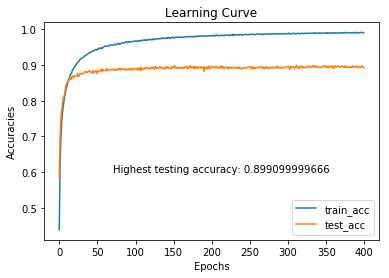

In [0]:
plt.plot(train_accs, label='train_acc')
plt.plot(test_accs, label='test_acc')
plt.ylabel('Accuracies')
plt.xlabel('Epochs')
plt.title('Learning Curve')
plt.text(70, 0.6, 'Highest testing accuracy: {}'.format(max(test_accs)))
plt.legend()
plt.show()

MNIST

In [0]:
train, test = tf.keras.datasets.mnist.load_data()

In [0]:
X_train, y_train = train
X_test, y_test = test

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))
y_train = y_train.flatten()
y_test = y_test.flatten()

In [0]:
def flip_lr(img):
  return np.fliplr(img)
def rotate(img):
  rand_angle = np.random.choice(np.arange(-15, 15), 1)[0]
#   to_reshape = np.random.choice([True, False], 1)[0]
  return (ndimage.rotate(img[:, :, 0], rand_angle, reshape=False)).reshape((28, 28, 1))
def blur_img(img):
  sigmas = [0.0, 0.1, 0.2, 0.3, 0.4]
  sigma = np.random.choice(sigmas, 1)[0]
  return (filters.gaussian(img[:, :, 0], sigma=sigma, mode='mirror')).reshape((28, 28, 1))
def hist_norm(img):
  return (exposure.equalize_hist(img[:, :, 0], nbins=32)).reshape((28, 28, 1))
def invert_im(img):
  return (1 - img[:, :, 0]).reshape((28, 28, 1))
def augment_image(img):
  ret_im = np.array(img)
  rand_val = np.random.random()
  if rand_val < 0.05:
    return img
  rand_val = np.random.random()
  if rand_val < 0.5:
    ret_im = invert_im(ret_im)
  rand_val = np.random.random()
  if rand_val < 0.5:
    ret_im = rotate(ret_im)
  rand_val = np.random.random()
  if rand_val < 0.5:
    ret_im = blur_img(ret_im)
  rand_val = np.random.random()
  if rand_val < 0.2:
    ret_im = hist_norm(ret_im)
  return ret_im

In [0]:
input_data = tf.placeholder(tf.float32, [None, 28, 28, 1])
input_labels = tf.placeholder(tf.int64, [None])
base_learning_rate = 0.5

cvl1 = conv_layer(input_data, 32, 3)
ccf1 = concat_func(input_data, cvl1)
res1 = res_block(cvl1, 64, 7, 512, 3)
ib1 = identity_block(res1, 64, 7)
ap1 = avg_pool_layer(ib1)
cvl2 = conv_layer(ib1, 128, 3)
sfn = sum_func(ccf1, ap1)
ccf2 = concat_func(sfn, cvl2)

flattened_output = tf.layers.flatten(ccf2)
# convb1 = conv_block(input_data, 128, 5)
# avg1 = avg_pool_layer(convb1)
# maxp1 = max_pool_layer(avg1)


# flattened_output = tf.layers.flatten(maxp1)
dense1 = tf.layers.dense(inputs=flattened_output, units=256, \
    activation=tf.nn.relu, kernel_regularizer=None)
logits = tf.layers.dense(inputs=dense1, units=10)

predictions = tf.nn.softmax(logits)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
    (labels=tf.one_hot(input_labels, 10), logits=logits))
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits\
#     (labels=tf.one_hot(input_labels, 10), logits=logits)) \
#      + tf.losses.get_regularization_loss()

global_step = tf.Variable(0, trainable=False, name='global_step')

learning_rate = tf.train.exponential_decay(base_learning_rate, global_step,
                                           800, 0.97, staircase=True)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
optimizer = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.argmax(predictions,1), input_labels)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [0]:
num_examples = X_train.shape[0]
train_accs = []
test_accs = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    n_epochs = 100 # number of epochs to run for while training
    batch_size = 128 # size of the batch
    
    for epoch in range(n_epochs):
        print('At epoch {}'.format(epoch))
        epoch_loss = 0 # holds cumulative loss over the epoch
        # will hold predictions for training data at this epoch
        c = 0 # will count the number of batches
        train_acc_sum = 0.0
        for i in range(0, num_examples, batch_size):
            x_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]
            x_batch = np.array([augment_image(img) for img in x_batch])

            train_loss, _, train_acc = sess.run([loss, optimizer, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})

            epoch_loss += train_loss
            c += 1
            train_acc_sum += train_acc
#             print('Have fed: {}/{}. train_loss: {} and train_acc: {}'\
#                 .format(i, num_examples, train_loss, train_acc))
        print('epoch_loss: {}'.format(epoch_loss))
        train_accs.append(train_acc_sum * 1.0 / c)
        print('Checking test set statistics at end of epoch')
        c = 0
        test_acc_sum = 0.0
        test_num = X_test.shape[0]
        test_batch_size = 200
        for i in range(0, test_num, test_batch_size):
            x_batch, y_batch = X_test[i:i+test_batch_size], y_test[i:i+test_batch_size]
            test_loss, test_acc = sess.run([loss, accuracy], \
                feed_dict={input_data: x_batch, input_labels: y_batch})
            c += 1
            test_acc_sum += test_acc
        test_acc = test_acc_sum * 1.0 / c
        print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))
        test_accs.append(test_acc)
#         if test_acc > best_test_acc:
#             saver.save(sess, \
#                 'mnist_models/mnist_{}_{}'.format(epoch, test_acc).replace('.', '_'))
#             best_test_acc = test_acc

#     print('\n\nFinal test set statistics')
#     test_loss, test_acc = sess.run([loss, accuracy], \
#             feed_dict={input_data: X_test, input_labels: y_test})

#     print('test_loss: {} and test_acc: {}'.format(test_loss, test_acc))

NameError: ignored

In [0]:
test_accs

In [0]:
plt.plot(train_accs, label='train_acc')
plt.plot(test_accs, label='test_acc')
plt.ylabel('Accuracies')
plt.xlabel('Epochs')
plt.title('Learning Curve')
plt.text(10, 0.91, 'Highest testing accuracy: {}'.format(max(test_accs)))
plt.legend()
plt.show()